# This notebook is intended only for visualizations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product

In [2]:
ap_scores = pd.read_csv('ap_scores.csv')

In [3]:
ap_scores.head()

,detection_type,trained_on,inference_on,easy,medium,hard,results_from
0,bev,clean,adversarial,0.053582,0.089052,0.117729,us
1,3d,clean,adversarial,0.001763,0.003453,0.005650,us
2,bev,adversarial,adversarial,83.845039,76.842575,76.430855,us
3,3d,adversarial,adversarial,66.106766,60.395126,61.042713,us
4,bev,adversarial,clean,86.970261,78.465691,78.289085,us


In [4]:
def get_plots(detection_type, level):
    level_det = ap_scores.loc[ap_scores.detection_type == detection_type]
    level_det = level_det.sort_values(by=['inference_on', 'trained_on'])
    
    X = ['Adv. Data', 'Clean Data', 'SSN Data']
    adv = level_det.loc[level_det.trained_on == 'adversarial'][level].values
    clean = level_det.loc[level_det.trained_on == 'clean'][level].values
    ssn = level_det.loc[level_det.trained_on == 'ssn'][level].values

    X_axis = np.arange(len(X))

    plt.bar(X_axis - 0.125, adv, 0.2, label = 'Adv. Model', color='#f37736')
    plt.bar(X_axis + 0.075, clean, 0.2, label = 'Clean Model', color='#0392cf')
    plt.bar(X_axis + 0.275, ssn, 0.2, label = 'SSN Model',color='#9999ff')

    plt.xticks(X_axis, X)
    plt.xlabel("Data Evaluated On")
    plt.ylabel("AP Scores")
    plt.title(
        f"AP Scores for {detection_type.upper()}"
        + f" Object Detection on the {level} KITTI Test Set")
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()    

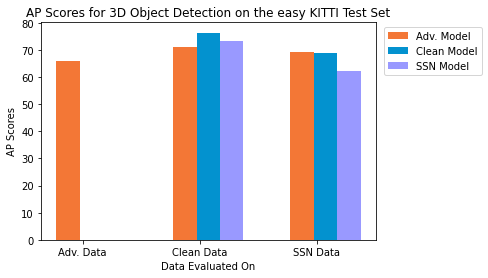

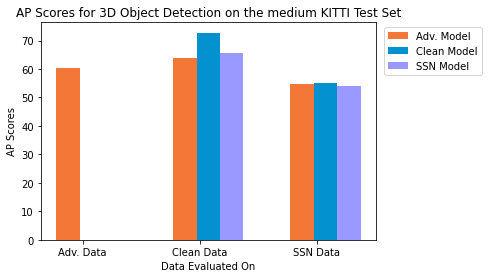

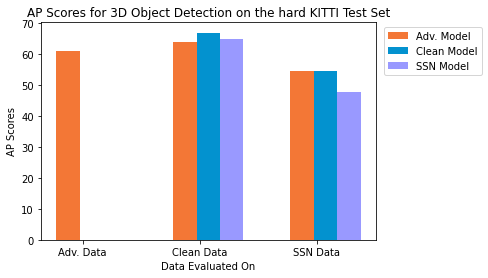

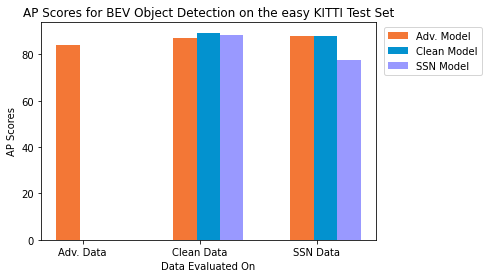

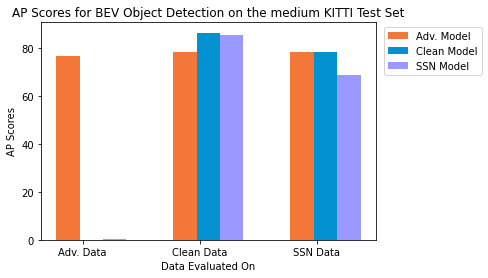

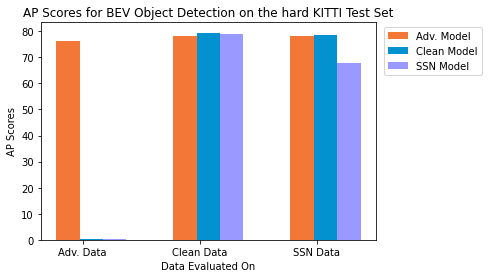

In [5]:
for det_type, level in product(['3d', 'bev'], ['easy', 'medium', 'hard']):
    get_plots(det_type, level)

In [6]:
def plot_adv(detection_type, level):
    X = ['Adv Data']
    level_det = ap_scores.loc[(ap_scores.detection_type == detection_type) &
              (ap_scores.trained_on != 'adversarial')
                             & (ap_scores.inference_on == 'adversarial')]
    level_det = level_det.sort_values(by=['inference_on', 'trained_on'])
    level_det[level].values
    
    clean = level_det.loc[level_det.trained_on == 'clean'][level].values
    ssn = level_det.loc[level_det.trained_on == 'ssn'][level].values
    
    X_axis = np.arange(len(X))
    plt.bar(X_axis - .2, clean, 0.4, label = 'Clean Model', color='#0392cf')
    plt.bar(X_axis + .2, ssn, 0.4, label = 'SSN Model',color='#9999ff')
    
    plt.xticks(X_axis, X)
    plt.xlabel("Data Evaluated On")
    plt.ylabel("AP Scores")
    plt.title(
        f"AP Scores for {detection_type.upper()}"
        + f" Object Detection on the {level} KITTI Test Set")
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()        

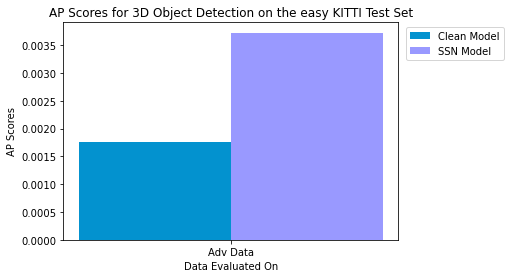

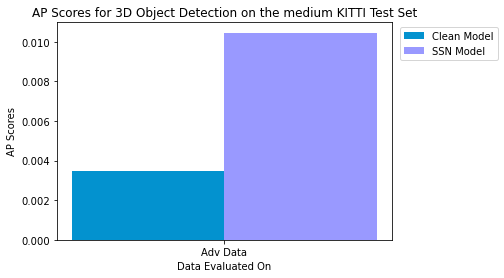

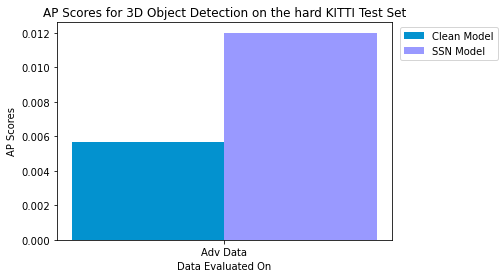

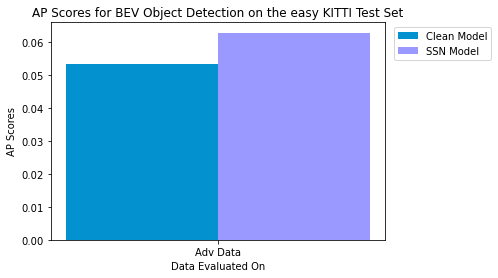

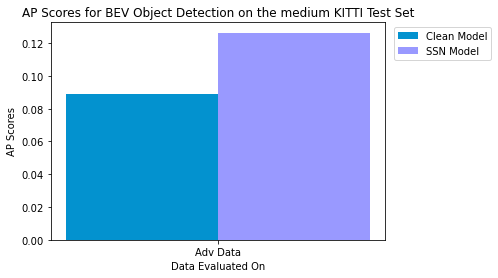

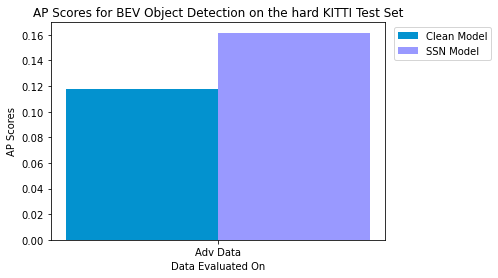

In [7]:
for det_type, level in product(['3d', 'bev'], ['easy', 'medium', 'hard']):
    plot_adv(det_type, level)

In [8]:
ap_scores_pretty = ap_scores.copy()

In [9]:
ap_scores_pretty.detection_type = \
    ap_scores_pretty.detection_type.apply(lambda x: x.upper())

In [10]:
ap_scores_pretty = ap_scores_pretty.drop(columns=["results_from"])

In [11]:
ap_scores_pretty.columns = \
    ap_scores_pretty.columns.map(lambda x: x.replace("_", " ").title())

In [12]:
ap_scores_pretty.to_csv('ap_scores_pretty.csv')

In [13]:
ap_scores_pretty.head()

,Detection Type,Trained On,Inference On,Easy,Medium,Hard
0,BEV,clean,adversarial,0.053582,0.089052,0.117729
1,3D,clean,adversarial,0.001763,0.003453,0.005650
2,BEV,adversarial,adversarial,83.845039,76.842575,76.430855
3,3D,adversarial,adversarial,66.106766,60.395126,61.042713
4,BEV,adversarial,clean,86.970261,78.465691,78.289085
